In [1]:
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

## Get the Data
** Readthe data from the csv filex.**

In [2]:
df = pd.read_csv('Bangladesh 2015_2024.csv')

In [3]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,bangladesh,1/1/2015,80.6,64.4,71.2,80.8,64.4,71.2,60.3,70.3,...,5.3,4,NaN,2015-01-01T06:40:46,2015-01-01T17:22:45,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VGHS,41941099999,41923099999,41929099999,41922..."
1,bangladesh,1/2/2015,83.2,69.0,75.0,83.5,69.0,75.1,61.6,64.6,...,13.7,6,NaN,2015-01-02T06:41:04,2015-01-02T17:23:24,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VGHS,41941099999,41929099999,41923099999,41922..."
2,bangladesh,1/3/2015,84.2,69.8,75.5,85.9,69.8,75.7,63.7,67.9,...,10.6,5,NaN,2015-01-03T06:41:20,2015-01-03T17:24:03,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VGHS,41941099999,41929099999,41923099999,41922..."
3,bangladesh,1/4/2015,80.6,69.6,74.3,82.3,69.6,74.4,65.7,75.3,...,9.9,4,NaN,2015-01-04T06:41:36,2015-01-04T17:24:43,0.47,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41941099999,41923099999,41929099999,41922..."
4,bangladesh,1/5/2015,77.0,64.4,69.8,77.0,64.4,69.8,59.2,70.3,...,12.4,5,NaN,2015-01-05T06:41:50,2015-01-05T17:25:24,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VGHS,41941099999,41929099999,41923099999,41922..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,bangladesh,12/14/2024,82.7,63.9,72.3,80.8,63.9,72.1,48.6,44.2,...,15.5,6,10.0,2024-12-14T06:32:40,2024-12-14T17:13:45,0.46,Clear,Clear conditions throughout the day.,clear-day,NaN
3636,bangladesh,12/15/2024,82.5,63.6,72.3,80.4,63.6,72.1,46.9,41.9,...,15.5,6,10.0,2024-12-15T06:33:15,2024-12-15T17:14:07,0.50,Clear,Clear conditions throughout the day.,clear-day,NaN
3637,bangladesh,12/16/2024,82.5,65.2,73.2,80.2,65.2,72.9,43.8,36.0,...,15.5,6,10.0,2024-12-16T06:33:50,2024-12-16T17:14:31,0.53,Clear,Clear conditions throughout the day.,clear-day,NaN
3638,bangladesh,12/17/2024,82.1,65.4,73.3,80.3,65.4,73.1,45.3,37.4,...,15.5,6,10.0,2024-12-17T06:34:24,2024-12-17T17:14:56,0.56,Clear,Clear conditions throughout the day.,clear-day,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3640 non-null   object 
 1   datetime          3640 non-null   object 
 2   tempmax           3640 non-null   float64
 3   tempmin           3640 non-null   float64
 4   temp              3640 non-null   float64
 5   feelslikemax      3640 non-null   float64
 6   feelslikemin      3640 non-null   float64
 7   feelslike         3640 non-null   float64
 8   dew               3640 non-null   float64
 9   humidity          3640 non-null   float64
 10  precip            3640 non-null   float64
 11  precipprob        3640 non-null   float64
 12  precipcover       3640 non-null   float64
 13  preciptype        2250 non-null   object 
 14  snow              3640 non-null   int64  
 15  snowdepth         3640 non-null   int64  
 16  windgust          3640 non-null   float64


In [4]:
columns_to_drop = ['name', 'datetime','feelslikemax' , 'feelslikemin' , 'feelslike' , 'preciptype', 'snow', 'precipprob', 'precipcover', 'snowdepth', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations' ] 
weather = df.drop(columns=columns_to_drop)

In [5]:
weather

,tempmax,tempmin,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,80.6,64.4,71.2,60.3,70.3,0.068,11.0,6.9,168.3,1013.9,86.2,1.6,63.7,5.3
1,83.2,69.0,75.0,61.6,64.6,0.056,13.0,5.8,117.5,1014.7,65.9,2.0,158.4,13.7
2,84.2,69.8,75.5,63.7,67.9,0.000,8.3,6.9,18.8,1013.7,77.8,1.9,121.8,10.6
3,80.6,69.6,74.3,65.7,75.3,0.052,16.8,11.4,296.4,1011.8,79.4,2.0,116.2,9.9
4,77.0,64.4,69.8,59.2,70.3,0.000,17.7,11.4,299.2,1012.0,44.0,2.4,143.8,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,82.7,63.9,72.3,48.6,44.2,0.000,12.5,8.7,331.7,1012.8,13.7,15.0,178.3,15.5
3636,82.5,63.6,72.3,46.9,41.9,0.000,11.0,6.7,318.7,1013.6,0.7,15.0,179.3,15.5
3637,82.5,65.2,73.2,43.8,36.0,0.000,5.8,4.5,239.7,1013.2,0.0,15.0,178.5,15.5
3638,82.1,65.4,73.3,45.3,37.4,0.000,6.3,4.7,97.9,1012.9,0.0,15.0,176.0,15.5


## EDA
It's time to create some data visualizations!** Feature Distribution & Correlation:***

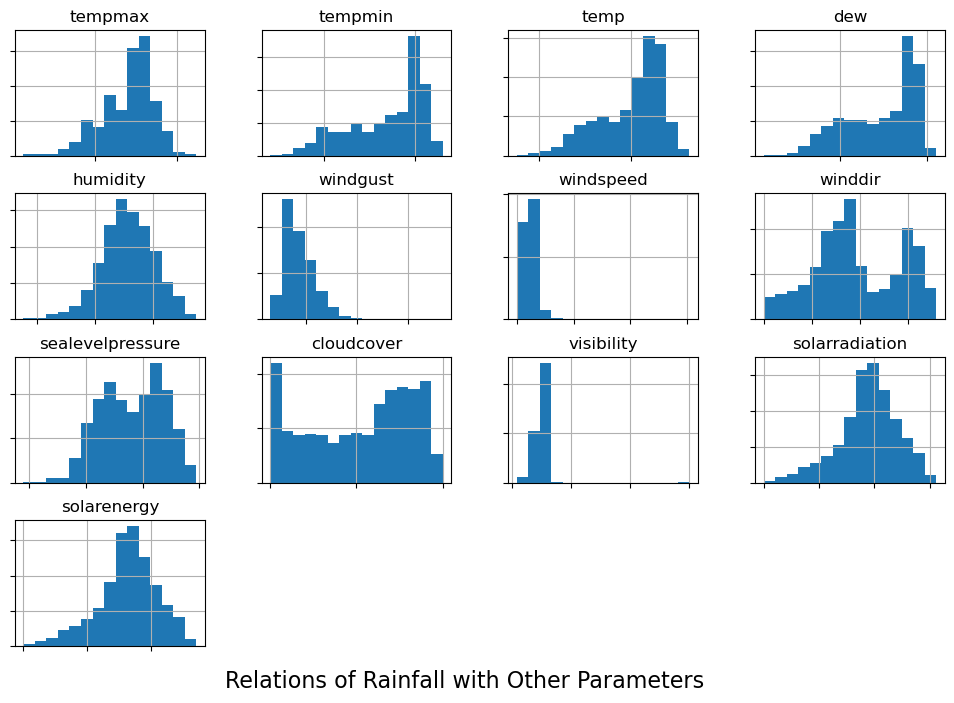

In [6]:
new_df = weather.drop(columns=["precip"])
distr_hist = new_df.hist(bins=15, edgecolor='none', figsize=(12, 8))

# Add a super title at the bottom
plt.suptitle("Relations of Rainfall with Other Parameters", fontsize=16, y=0.08)

for axis in distr_hist.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

plt.savefig('histogram.png', dpi=1000)
plt.show()

In [7]:
weather["tempmax"].describe()

count    3640.000000
mean       87.912912
std         6.403000
min        62.600000
25%        84.200000
50%        89.600000
75%        93.200000
max       104.600000
Name: tempmax, dtype: float64

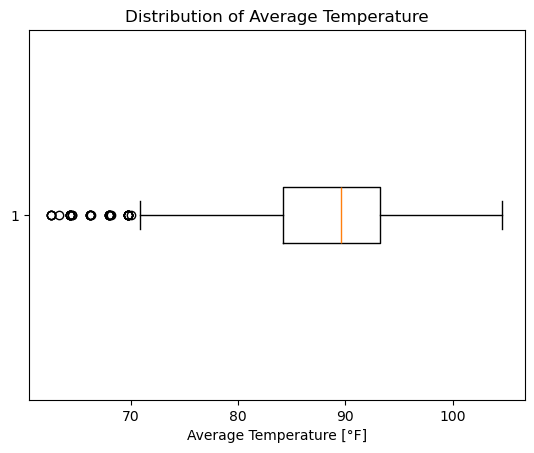

In [16]:
# Use a horizontal boxplot to check for outliers in the 'Tempmax' column:
plt.boxplot(weather["tempmax"], vert = False)
plt.xlabel("Average Temperature [°F]")
plt.title("Distribution of Average Temperature");

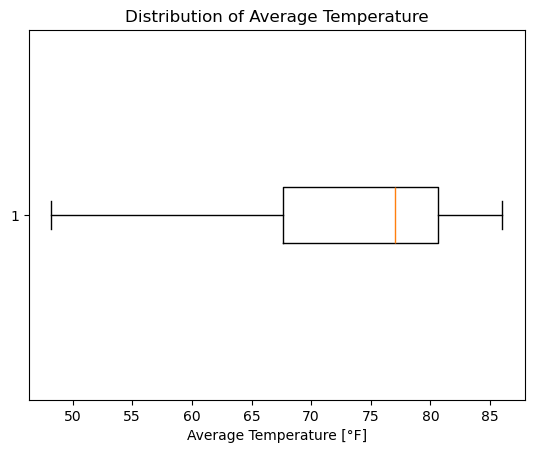

In [17]:
weather["tempmin"].describe()
# Use a horizontal boxplot to check for outliers in the 'Tempmin' column:
plt.boxplot(weather["tempmin"], vert = False)
plt.xlabel("Average Temperature [°F]")
plt.title("Distribution of Average Temperature");

In [20]:
weather["precip"].describe()

count    3640.000000
mean        0.207865
std         0.415159
min         0.000000
25%         0.000000
50%         0.028000
75%         0.250000
max         7.783000
Name: precip, dtype: float64

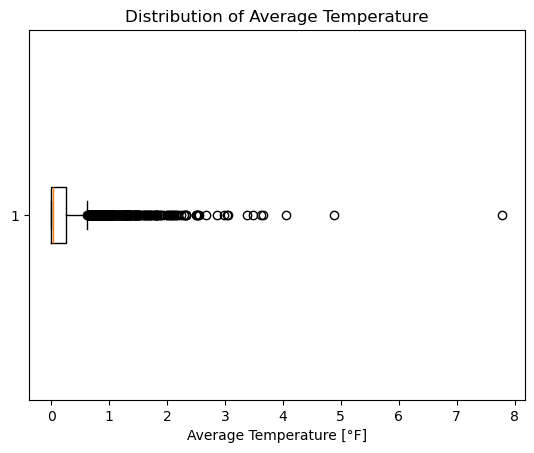

In [21]:
# Use a horizontal boxplot to check for outliers in the column:
plt.boxplot(weather["precip"], vert = False)
plt.xlabel("Average Temperature [°F]")
plt.title("Distribution of Average Temperature");

In [22]:
weather["dew"].describe()

count    3640.000000
mean       69.392582
std         8.088357
min        42.700000
25%        62.600000
50%        72.200000
75%        76.300000
max        82.000000
Name: dew, dtype: float64

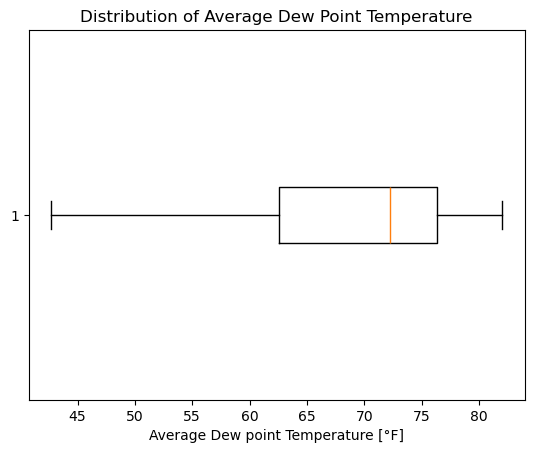

In [25]:
# Use a horizontal boxplot to check for outliers in the column:
plt.boxplot(weather["dew"], vert = False)
plt.xlabel("Average Dew point Temperature [°F]")
plt.title("Distribution of Average Dew Point Temperature");

In [24]:
weather["humidity"].describe()

count    3640.000000
mean       71.378901
std         9.076698
min        35.500000
25%        65.675000
50%        71.300000
75%        77.600000
max        94.900000
Name: humidity, dtype: float64

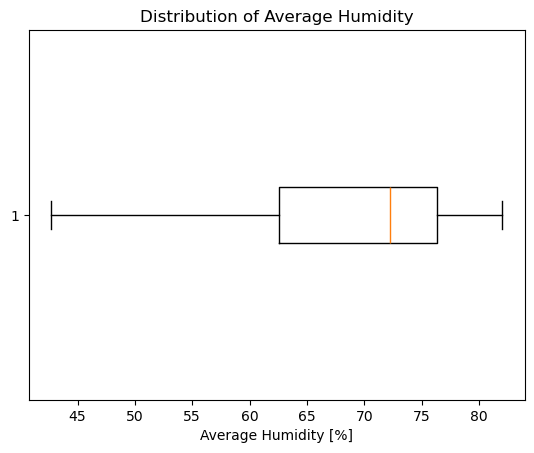

In [26]:
# Use a horizontal boxplot to check for outliers in the column:
plt.boxplot(weather["dew"], vert = False)
plt.xlabel("Average Humidity [%]")
plt.title("Distribution of Average Humidity");

In [28]:
weather["sealevelpressure"].describe()

count    3640.000000
mean     1008.147720
std         5.466671
min       989.100000
25%      1003.700000
50%      1008.400000
75%      1012.700000
max      1019.400000
Name: sealevelpressure, dtype: float64

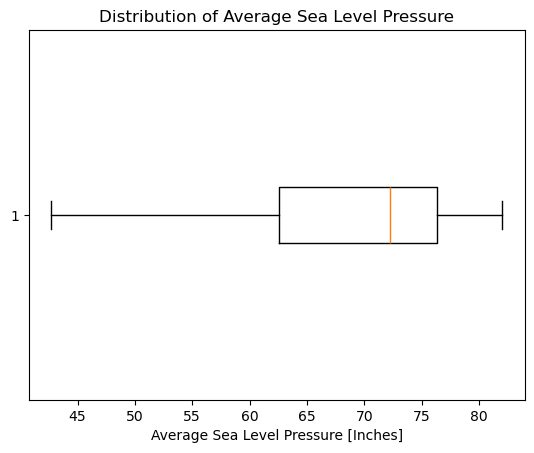

In [29]:
# Use a horizontal boxplot to check for outliers in the column:
plt.boxplot(weather["dew"], vert = False)
plt.xlabel("Average Sea Level Pressure [Inches]")
plt.title("Distribution of Average Sea Level Pressure");

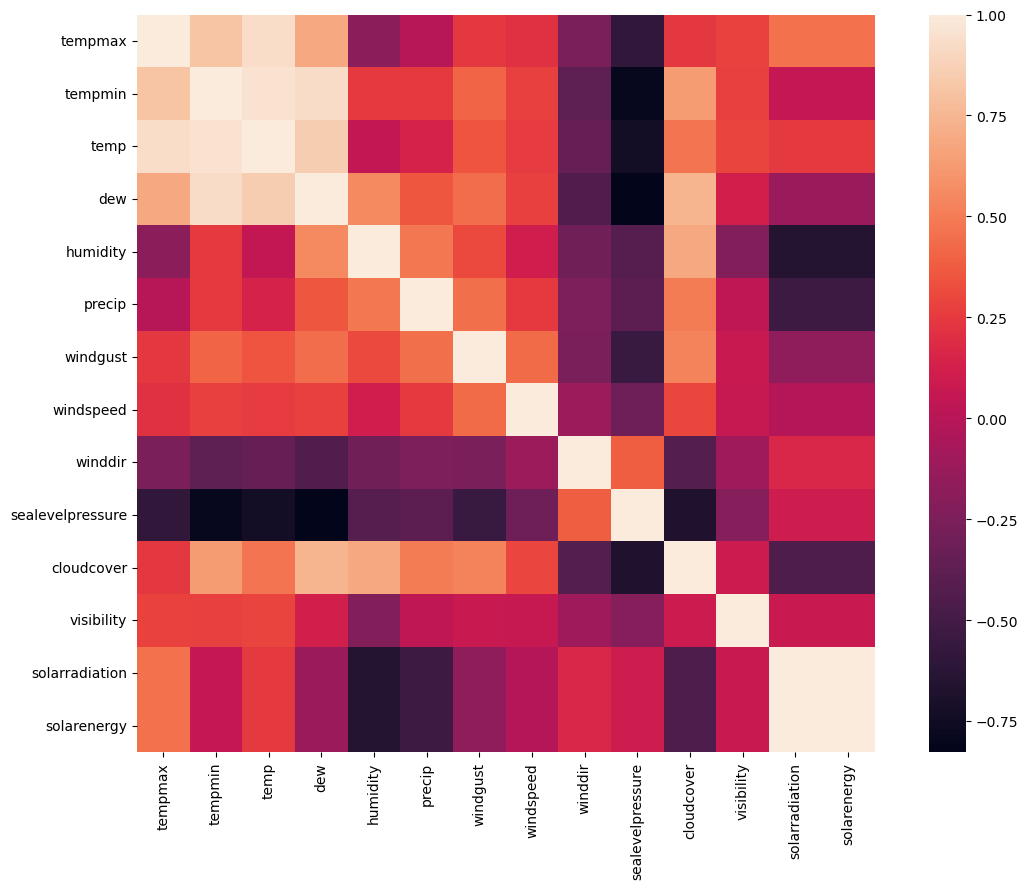

In [8]:
# Shows the relationship between the dependent variables and the independent variable:
corrmatrix = weather.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.tight_layout()
plt.savefig('heatmap.png', dpi=1000)
plt.show()

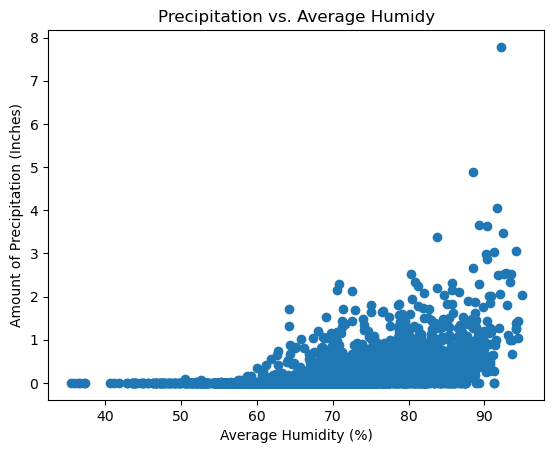

In [9]:
# Create a scatterplot to test if 'HumidityAvgPercent' influences the amount of precipitation:
plt.scatter(weather["humidity"], weather["precip"])
plt.xlabel("Average Humidity (%)")
plt.ylabel("Amount of Precipitation (Inches)")
plt.title("Precipitation vs. Average Humidy");
plt.savefig('1.png' , dpi=1000)

In [10]:
# The Pearson correlation coefficient of 'PrecipitationSumInches' and 'HumidityAvgPercent':
p_correlation = weather["humidity"].corr(weather["precip"])
p_correlation

0.48445161425751454

## Training & test dataset

In [11]:
input_weather = weather.drop(columns=['precip'])  # Remove 'precip' to use other columns as features
output_weather = weather['precip']  # Use 'precip' as the target variable

from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(input_weather, output_weather, test_size=0.2, random_state=42)

print("input train: ", input_train.shape)
print("\ninput test: ", input_test.shape)
print("\noutput train: ", output_train.shape)
print("\noutput test: ", output_test.shape)

input train:  (2912, 13)

input test:  (728, 13)

output train:  (2912,)

output test:  (728,)


In [12]:
# Standardize the training and test set:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

In [13]:
# Print the first 10 rows of the 'input_train' 2D array:
print(input_train[:10])

[[-8.61217221e-01 -1.37722817e+00 -1.18723732e+00 -1.12787637e+00
  -2.41426086e-01 -1.08921021e+00 -5.00032528e-01  1.18577665e+00
   1.39987342e+00 -1.50170834e+00 -8.54475608e-01 -2.26970175e-01
  -2.22662021e-01]
 [ 2.65603424e-01 -4.82233946e-03  3.01498607e-01  4.37706879e-02
  -4.88565417e-01 -7.18945965e-01 -5.97500953e-01 -1.68046155e+00
   8.68625341e-01 -8.39871129e-01  1.30963192e-01  2.68373284e-01
   2.50899486e-01]
 [ 5.47308585e-01 -6.17503513e-01  1.13599898e-01 -1.12787637e+00
  -2.17360631e+00 -7.99438193e-01 -3.46867860e-01  1.51794922e+00
   1.61970022e+00 -1.69174080e+00  1.30963192e-01  1.19015904e+00
   1.17649698e+00]
 [ 1.11071891e+00  8.28424057e-01  1.00973220e+00  3.17985958e-01
  -1.05024572e+00  6.01126572e-01  1.47189658e+01 -1.39580783e-01
  -1.25636699e+00 -8.30176881e-02  7.78334217e-03  1.82889140e+00
   1.82226267e+00]
 [-2.97806899e-01 -1.76373068e-01 -2.33290026e-01  1.43485332e-01
   6.34795179e-01 -6.22355292e-01 -4.05385256e-02 -9.40572158e-01


## Mechine Learnign algorithms

In [14]:
y_train_mean = output_train.mean()
y_pred_baseline = [y_train_mean] * len(output_train)
mae_baseline = mean_absolute_error(output_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(output_train, y_pred_baseline))
print("Mean precipitation level is: ", round(y_train_mean, 2))
print("Baseline MAE is: ", round(mae_baseline, 2))
print("Baseline RMSE is: ", round(rmse_baseline, 2))

Mean precipitation level is:  0.21
Baseline MAE is:  0.25
Baseline RMSE is:  0.42


## Select & Train a Model
## 1. Multivariate Linear Regression (MLR)

In [15]:
# Create a linear regression model and train it:
model = LinearRegression()
model.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", model.intercept_)
print("\nThe coefficient is: ", model.coef_)

# Make predictions:
predictions_lr = model.predict(input_train)

The intercept is:  0.20906593406593307

The coefficient is:  [ 0.01973012 -0.11673907  1.06224172 -1.1293758   0.605593    0.0982496
  0.03128409 -0.00917893 -0.05698308  0.00530536 -0.00312747 -0.11506597
 -0.09072786]


In [16]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_lr)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(model, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.18 

Scores RMSE:  [0.26297962 0.24923181 0.42820026 0.27957503 0.27704598 0.28550815
 0.27639051 0.29473488 0.25118271 0.3854972 ]
Standard deviation:  0.05639681848819738 

Mean RMSE is:  0.3


## 2. K Nearest Neighbors Regressor (KNN)

In [17]:
# Create a KNeighbors Regression model and train it:
kn_reg = KNeighborsRegressor(n_neighbors = 2)
kn_reg.fit(input_train, output_train)

# Make predictions:
predictions_knn = kn_reg.predict(input_train)

In [18]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_knn)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(kn_reg, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.08 

Scores RMSE:  [0.23836892 0.26247928 0.47753817 0.27344165 0.29901004 0.30020009
 0.30836517 0.29637489 0.25711709 0.36022363]
Standard deviation:  0.06515111039862356 

Mean RMSE is:  0.31


## 3. Ridge Regression

In [19]:
# Create a ridge regression model and train it:
ridge = Ridge()
ridge.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", ridge.intercept_)
print("\nThe coefficient is: ", ridge.coef_)

# Make predictions:
predictions_r = ridge.predict(input_train)

The intercept is:  0.20906593406593332

The coefficient is:  [ 0.03492364 -0.10446527  0.87252235 -0.93653471  0.5078082   0.09888004
  0.03102819 -0.00882886 -0.05925082  0.00466826 -0.00117344 -0.10548721
 -0.10165408]


In [20]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_r)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(ridge, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.18 

Scores RMSE:  [0.26362427 0.24938759 0.42866904 0.27951918 0.2747611  0.28607459
 0.27663059 0.29393634 0.25136055 0.38698082]
Standard deviation:  0.056742463404168914 

Mean RMSE is:  0.3


In [ ]:
# Parameter 2 (alpha = 25)

In [21]:
# Create a ridge regression model and train it:
ridge25 = Ridge(alpha = 25)
ridge25.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", ridge25.intercept_)
print("\nThe coefficient is: ", ridge25.coef_)

# Make predictions:
predictions_r25 = ridge25.predict(input_train)

The intercept is:  0.20906593406593418

The coefficient is:  [ 0.08052039 -0.05836666  0.15148242 -0.18887311  0.1283265   0.10073873
  0.03023178 -0.00767872 -0.06638222  0.00235683  0.00631306 -0.10387579
 -0.10560964]


In [25]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_r25)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(ridge25, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.18 

Scores RMSE:  [0.27094596 0.25444695 0.43390089 0.28214021 0.27505889 0.29394818
 0.28171258 0.29784331 0.25542491 0.39451522]
Standard deviation:  0.057381155549401736 

Mean RMSE is:  0.3


## 4. Random Forest Regressor

In [22]:
# Make a Random Forest Regressor model and train it:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(input_train, output_train)

# Make predictions:
predictions_forest = forest_reg.predict(input_train)

In [ ]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_forest)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(forest_reg, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.05 



## Fine-tune The Models

## Random Forest Regressor

In [ ]:
# Using 'GridSearchCV' to find the best hyperparameters for the model:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators" : [3, 6, 9],
    "max_depth" : [1, 2, 3, 4],
}
 
clf = GridSearchCV(forest_reg, parameters)
clf.fit(input_train, output_train)

In [ ]:
# Make predictions using best hyperparameters:
y_pred_train = clf.predict(input_train)

# Evaluate model performance using MAE and RMSE:
mae_training = mean_absolute_error(output_train, y_pred_train)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
rmse_training = np.sqrt(mean_squared_error(output_train, y_pred_train))
print("The training RMSE is: ", round(rmse_training), 2)

## Present The Solution (Evaluate On The Test Set)
** Using Random Forest Regressor (Not Tweaked) **

In [30]:
# Make predictions
y_pred = forest_reg.predict(input_test)

# Evaluate model performance using MAE and RMSE:
mae_test = mean_absolute_error(output_test, y_pred)
print("The test MAE is: ", round(mae_test, 2), "\n")
# The Root Mean Squared Error:
rmse_test = np.sqrt(mean_squared_error(output_test, y_pred))
print("The test RMSE is: ", round(rmse_test), 2)

The test MAE is:  0.12 

The test RMSE is:  0 2


## Communicate Results
** Linear Equation of My Model **

In [32]:
# Extract the intercept and coefficient from the linear model:
intercept = model.intercept_.round(2)
coefficients = model.coef_.round(2)
# Get the feature names:
feature_names = input_weather.columns
print("features len: ", len(feature_names))
print(feature_names)

# Put together the coefficients and feature names into a Series:
feature_imp = pd.Series(coefficients, index = feature_names)
feature_imp.head(10)

features len:  13
Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy'],
      dtype='object')


tempmax             0.02
tempmin            -0.12
temp                1.06
dew                -1.13
humidity            0.61
windgust            0.10
windspeed           0.03
winddir            -0.01
sealevelpressure   -0.06
cloudcover          0.01
dtype: float64

In [33]:
# Print the linear equation for the model:
print(f"Precipation Level  = {intercept.round(2)}")
for f, c in feature_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

Precipation Level  = 0.21
+ (0.02 * tempmax)
+ (-0.12 * tempmin)
+ (1.06 * temp)
+ (-1.13 * dew)
+ (0.61 * humidity)
+ (0.1 * windgust)
+ (0.03 * windspeed)
+ (-0.01 * winddir)
+ (-0.06 * sealevelpressure)
+ (0.01 * cloudcover)
+ (-0.0 * visibility)
+ (-0.12 * solarradiation)
+ (-0.09 * solarenergy)


## Top Coefficients for The Model

Text(0.5, 1.0, 'Feature Importance of Precipitation Amount')

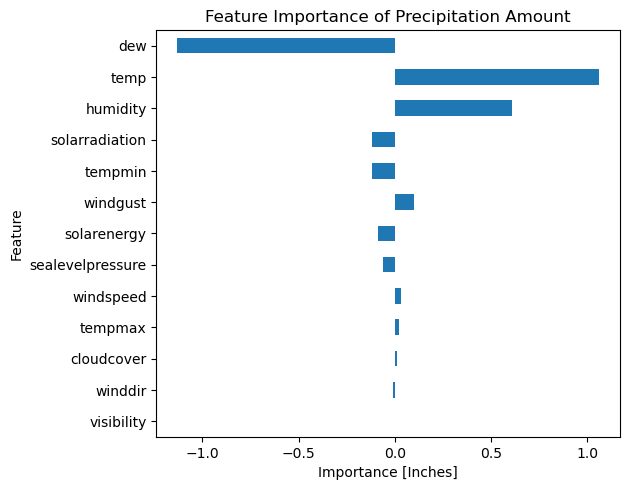

In [35]:
# Use a horizontal bar chart to show the top coefficients for my model, based on their absolute value

# Sort the coefficients in decending order:
feature_imp.sort_values()
# Sort them according to their absolute value:
feature_imp.sort_values(key=abs).tail(14).plot(kind="barh")
plt.xlabel("Importance [Inches]")
plt.ylabel("Feature")
plt.tight_layout() 
plt.savefig('feature importance of the precipitation amount 1.png', dpi=1000)
plt.title("Feature Importance of Precipitation Amount")

## Model Predictions (Random Forest Regressor Model)

In [38]:
# Create a DataFrame to hold the true values of the test set and the model's predictions:
predictions = pd.DataFrame (
    zip(output_test, y_pred, output_test - y_pred),
    columns = ["y_test", "y_pred", "error"]
)

predictions.head(10)

,y_test,y_pred,error
0,0.000,0.00036,-0.00036
1,0.000,0.05208,-0.05208
2,0.000,0.00000,0.00000
3,0.000,0.00000,0.00000
4,0.000,0.00000,0.00000
5,0.056,0.16548,-0.10948
6,0.000,0.00000,0.00000
7,0.249,0.33643,-0.08743
8,0.000,0.00072,-0.00072
9,0.000,0.00000,0.00000


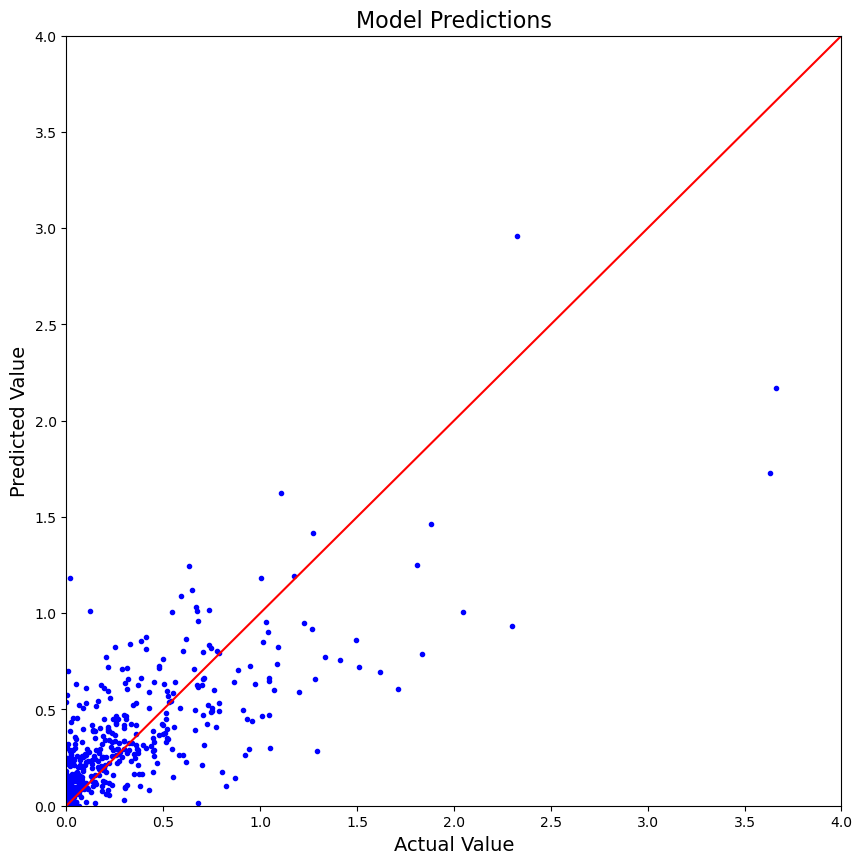

In [39]:
# Create a Line plot to visualize model results:

plt.figure(figsize = (10, 10))
x = np.linspace(0, 5, 5)
plt.plot(predictions["y_test"], predictions["y_pred"], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title("Model Predictions", fontsize=16)
plt.xlabel("Actual Value", fontsize=14)
plt.ylabel("Predicted Value", fontsize=14)
plt.savefig("Rainfall Predictions.png", dpi=1000)
plt.show();

## Compare The Coefficients of The Ridge & Linear Regression Model

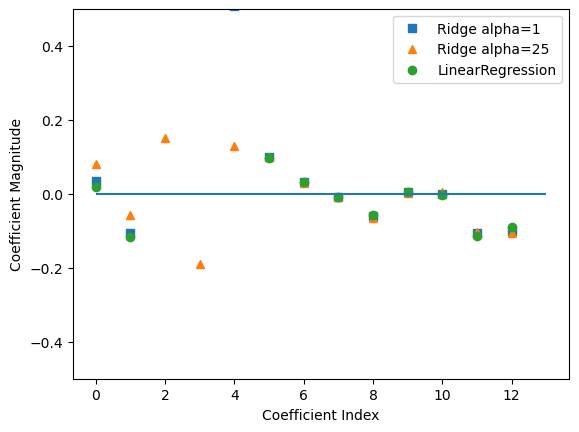

In [40]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge25.coef_, '^', label = "Ridge alpha=25")

plt.plot(model.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-0.5, 0.5)
plt.legend()
plt.savefig("comparecoefficientridgevslinear.png", dpi=1000)

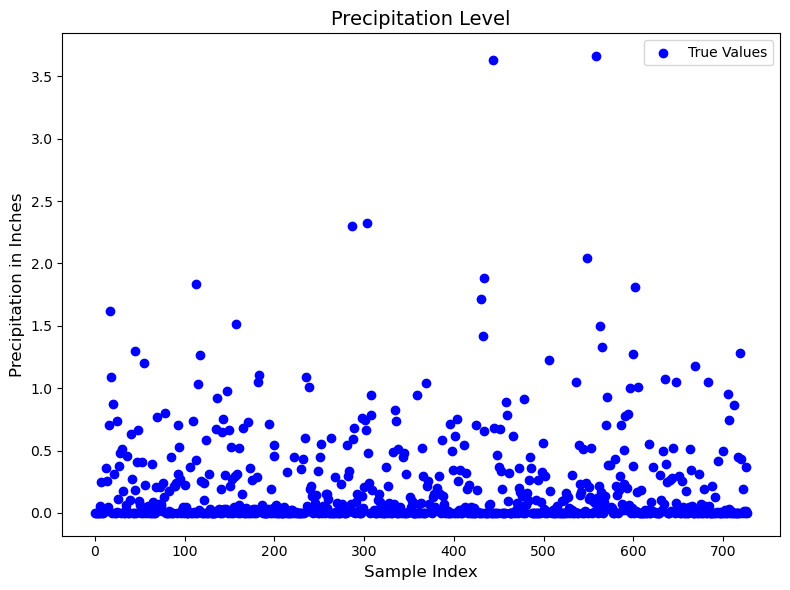

In [42]:
import matplotlib.pyplot as plt

# Assuming `predictions` DataFrame has columns 'y_test' and 'y_pred'
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot all data points as green dots
plt.scatter(predictions.index, predictions['y_test'], color='blue', label='True Values')

# Optionally, highlight a specific point (e.g., index 800)
highlight_index = 800  # Example index to highlight
if highlight_index in predictions.index:
    plt.scatter(highlight_index, predictions.loc[highlight_index, 'y_test'], color='red', label='Highlighted Point')

# Add labels, title, and legend
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Precipitation in Inches', fontsize=12)
plt.title('Precipitation Level', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("precipitation level.png", dpi=1000)
plt.show()